# Jupiter notebook for the third seminar

In [127]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
%matplotlib inline

In [128]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import tqdm

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

We work with a load_boston dataset from sklearn

In [129]:
boston = load_boston()
columns = ["CRIM","RM","LSTAT"]
X = pd.DataFrame(boston.data, columns=boston.feature_names)[columns]
X = X / X.max()
y = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We want to do a ridge regression with polynomials of 9th degree on data from "CRIM", "RM" and "LSTAT" columns

In [130]:
seedForRandomShuffle = 120
alphaOfRidge = 0.1

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=seedForRandomShuffle)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=alphaOfRidge)
)

model.fit(X_train, y_train)

print('train MSE =', mean_squared_error(y_train, model.predict(X_train)))
print('test MSE  =', mean_squared_error(y_test, model.predict(X_test)))

train MSE = 17.95720680095187
test MSE  = 21.06830007005941


And now it's time for K-fold cross-validation of the model above

In [132]:
def histDrawer(Folds):
    numberOfFolds = Folds
    testScore = cross_validate(model,X,y,scoring="neg_mean_squared_error",
                      cv=numberOfFolds)['test_score']
    trainScore = cross_validate(model,X,y,scoring="neg_mean_squared_error",
                      cv=numberOfFolds,return_train_score=True)['train_score']
    plt.hist(-testScore,bins=numberOfFolds,label="test_score")
    plt.hist(-trainScore,bins=numberOfFolds,label="train_score")
    plt.legend()
    plt.show()

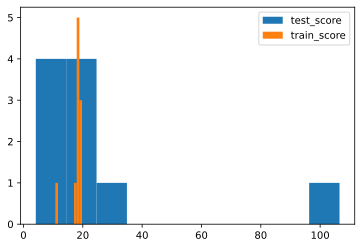

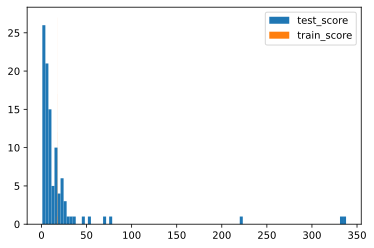

In [133]:
histDrawer(10)
histDrawer(100)